In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
ASSETS = ["META", "TSLA", "GOOG", "MSFT"]
ASSETS.sort()
n_assets = len(ASSETS)

In [3]:
prices_df = yf.download(ASSETS,
                        start="2023-01-01",
                        end="2023-12-31")

[*********************100%%**********************]  4 of 4 completed


In [4]:
returns_df = prices_df["Adj Close"].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

In [5]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [6]:
portf_rtns = np.dot(weights, avg_returns)
portf_vol = []
for i in range(0, len(weights)):
    vol = np.sqrt(
        np.dot(weights[i].T, np.dot(cov_mat, weights[i]))
    )
    portf_vol.append(vol)
portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

In [7]:
portf_results_df = pd.DataFrame(
    {"returns": portf_rtns,
     "volatility": portf_vol,
     "sharpe_ratio": portf_sharpe_ratio}
)

In [8]:
N_POINTS = 100
ef_rtn_list = []
ef_vol_list = []
possible_ef_rtns = np.linspace(portf_results_df["returns"].min(),
                               portf_results_df["returns"].max(),
                               N_POINTS)
possible_ef_rtns = np.round(possible_ef_rtns, 2)
portf_rtns = np.round(portf_rtns, 2)

for rtn in possible_ef_rtns:
    if rtn in portf_rtns:
        ef_rtn_list.append(rtn)
        matched_ind = np.where(portf_rtns == rtn)
        ef_vol_list.append(np.min(portf_vol[matched_ind]))

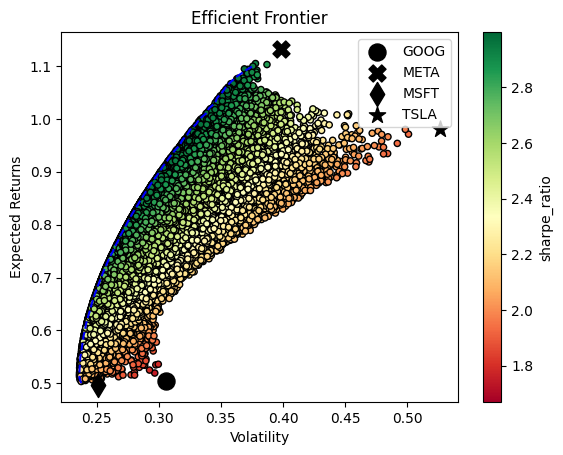

In [9]:
MARKERS = ["o", "X", "d", "*"]
fig, ax = plt.subplots()
portf_results_df.plot(kind="scatter", x="volatility",
                      y="returns", c="sharpe_ratio",
                      cmap="RdYlGn", edgecolors="black",
                      ax=ax)
ax.set(xlabel="Volatility",
       ylabel="Expected Returns",
       title="Efficient Frontier")
ax.plot(ef_vol_list, ef_rtn_list, "b--")
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
               y=avg_returns[asset_index],
               marker=MARKERS[asset_index],
                s=150, color="black",
                label=ASSETS[asset_index])
ax.legend()
plt.show()